In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 1.Read and explore the given dataset.

In [3]:
Ratings_df = pd.read_csv("ratings_Electronics.csv")

In [4]:
Ratings_df.columns = ["userId","productId","ratings","timestamp"]

In [5]:
Ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
Ratings_df = Ratings_df.drop(labels='timestamp', axis=1)

In [7]:
Ratings_df.shape

(7824481, 3)

In [8]:
Ratings_df.describe()

,ratings
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
Ratings_df.head()

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


C:\Users\vaishnavik\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


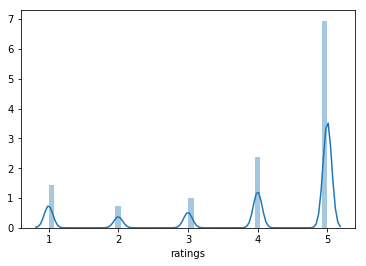

In [10]:
sns.distplot(Ratings_df['ratings'])

#### 2.Take a subset of the dataset to make it less sparse/ denser.

In [11]:
vc = Ratings_df.userId.value_counts()

In [12]:
vc_50 = vc[vc >= 50]

In [13]:
users_with_more_ratings = vc_50.to_frame()

In [14]:
users_with_more_ratings.reset_index(inplace=True)

In [15]:
users_with_more_ratings.drop(labels='userId',axis=1,inplace=True)

In [16]:
subset_df = Ratings_df[Ratings_df["userId"].isin(users_with_more_ratings['index'].values)]

In [17]:
subset_df.shape

(125871, 3)

#### 3.Split the data randomly into train and test dataset.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
ratings_train, ratings_test = train_test_split(subset_df, test_size=0.30, random_state=1)

In [20]:
ratings_train.shape

(88109, 3)

In [21]:
ratings_test.shape

(37762, 3)

#### 4.Build Popularity Recommender model

In [22]:
import Recommenders as Recommenders

In [23]:
pm = Recommenders.popularity_recommender_py()
pm.create(ratings_train, 'userId', 'productId')

In [24]:
users = ratings_train['userId'].unique()

In [25]:
user_id = users[20]
pm.recommend(user_id)

,user_id,productId,ratings,Rank
30797,A27M75LRSJ788H,B0088CJT4U,647.0,1.0
19529,A27M75LRSJ788H,B003ES5ZUU,603.0,2.0
8601,A27M75LRSJ788H,B000N99BBC,586.0,3.0
30194,A27M75LRSJ788H,B007WTAJTO,533.0,4.0
22667,A27M75LRSJ788H,B004CLYEDC,438.0,5.0
30489,A27M75LRSJ788H,B00829TIEK,435.0,6.0
30485,A27M75LRSJ788H,B00829THK0,393.0,7.0
17278,A27M75LRSJ788H,B002R5AM7C,381.0,8.0
31064,A27M75LRSJ788H,B008DWCRQW,376.0,9.0
17459,A27M75LRSJ788H,B002SZEOLG,371.0,10.0


In [26]:
user_id = users[7]
pm.recommend(user_id)

,user_id,productId,ratings,Rank
30797,ALQ4USPEQ9L5N,B0088CJT4U,647.0,1.0
19529,ALQ4USPEQ9L5N,B003ES5ZUU,603.0,2.0
8601,ALQ4USPEQ9L5N,B000N99BBC,586.0,3.0
30194,ALQ4USPEQ9L5N,B007WTAJTO,533.0,4.0
22667,ALQ4USPEQ9L5N,B004CLYEDC,438.0,5.0
30489,ALQ4USPEQ9L5N,B00829TIEK,435.0,6.0
30485,ALQ4USPEQ9L5N,B00829THK0,393.0,7.0
17278,ALQ4USPEQ9L5N,B002R5AM7C,381.0,8.0
31064,ALQ4USPEQ9L5N,B008DWCRQW,376.0,9.0
17459,ALQ4USPEQ9L5N,B002SZEOLG,371.0,10.0


#### 5.Build Collaborative Filtering model

In [27]:
R_df = subset_df.pivot_table(index = 'userId', columns ='productId', values = 'ratings').fillna(0)

In [28]:
R_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics import pairwise_distances

In [30]:
#get pearson similarities for ratings matrix M
pearson_sim = 1-pairwise_distances(R_df, metric="correlation")

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
import sklearn.metrics as metrics

In [33]:
global k,metric
k = 5
metric = 'correlation'

In [34]:
#This function finds k similar users given the user_id and ratings matrix M
#Note that the similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[user_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print('\n{} most similar users for User {}:\n'.format(k,user_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;

        else:
            print('{}: User {}, with similarity of {}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
            
    return similarities,indices

In [35]:
similarities,indices = findksimilarusers(1,R_df)


5 most similar users for User 1:

1: User 566, with similarity of 0.06457054959894326
2: User 22, with similarity of 0.06264997188815746
3: User 946, with similarity of 0.06139690396656583
4: User 653, with similarity of 0.05386502562199447
5: User 626, with similarity of 0.049918875315780764


In [36]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, similarities, indices,metric=metric, k=k):
    prediction=0
    mean_rating = ratings.iloc[user_id-1,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_id-1]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    #print('\nPredicted rating for user {} -> item {}: {}'.format(user_id,item_id,prediction))

    return prediction

In [37]:
predict_userbased(1,48169,R_df,similarities,indices)

1

In [38]:
users_list = R_df.index

In [39]:
products_list = R_df.columns

In [40]:
def recommend_products(user_id, ratings, N):
    #Create an empty dataframe to store the predicted ratings
    new_ratings = pd.DataFrame(columns=['pid','rating'],)
    
    #similar users based on cosine similarity
    similarities, indices=findksimilarusers(user_id, ratings)
    #reversed(range(len(products_list)-1))
    for i in reversed(range(len(ratings.columns)-1)):
        #print(i)
        user_rating = ratings.iloc[user_id-1,i]
        # if the user has already rated, ignore that product
        if( user_rating != 0.0):
            #print(i,user_rating)
            continue
        else:
            prediction = predict_userbased(0,i,ratings,similarities, indices)
            #print(i,prediction)
            new_ratings = new_ratings.append({'pid':i,'rating':prediction}, ignore_index=True)
    
    new_ratings_sorted = new_ratings.sort_values(by=['rating'], ascending=False)
    recomm = new_ratings_sorted['pid'].iloc[0:N,]
    
    return recomm.tolist()

In [41]:
#Top recommendations
x = recommend_products(35, R_df, 10)


5 most similar users for User 35:

1: User 1443, with similarity of 0.05407614313858733
2: User 1337, with similarity of 0.05311448965088128
3: User 742, with similarity of 0.048246067655226654
4: User 461, with similarity of 0.047633939984757845
5: User 792, with similarity of 0.04745718450610448


In [42]:
x

[2417, 26063, 5318, 9775, 22562, 13320, 11810, 16090, 29541, 18806]

In [43]:
for i in (x):
    print(products_list[i])

B00007E7K1
B003SQR4R0
B0002L9IE6
B000I202FI
B002W3VLB0
B000X0KHZK
B000PTFDYO
B001C6JA2A
B004HRCUEQ
B001SVNHIC


#### 6.Evaluate both the models

In [44]:
import random

In [45]:
#Create a test sample of users for use in calculating precision
#and recall
def create_user_test_sample(percentage, train_data, test_data):
    #Find users common between training and test set
    users_test_and_training = [*set(test_data['userId'].unique()).intersection(set(train_data['userId'].unique())),]
    print("Length of user_test_and_training:%d" % len(users_test_and_training))

    #Take only random user_sample of users for evaluations
    users_test_sample = remove_percentage(users_test_and_training, percentage)

    print("Length of user sample:%d" % len(users_test_sample))
    return users_test_sample

In [46]:
def remove_percentage(list_a, percentage):
    k = int(len(list_a) * percentage)
    random.seed(0)
    indicies = random.sample(range(len(list_a)), k)
    new_list = [list_a[i] for i in indicies]
    
    return new_list

In [47]:
users_test_sample = create_user_test_sample(0.01,ratings_train, ratings_test)

Length of user_test_and_training:1540
Length of user sample:15


In [48]:
pop_training_dict = dict()
collab_training_dict = dict()
test_dict = dict()

In [49]:
#Method to generate recommendations for users in the user test sample
def get_test_sample_recommendations_pop(train_data, test_data):

    for user_id in users_test_sample:
        #Get items for user_id from item similarity model
        #print("Getting recommendations for user:%s" % user_id)
        user_sim_items = pm.recommend(user_id)
        pop_training_dict[user_id] = [*(user_sim_items["productId"]),]
    
            #Get items for user_id from popularity model
            #user_sim_items = self.model1.recommend(user_id)
            #self.pm_training_dict[user_id] = list(user_sim_items["productId"])
    
        #Get items for user_id from test_data
        test_data_user = test_data[test_data['userId'] == user_id]
        test_dict[user_id] = set(test_data_user['productId'].unique() )
        
    return

In [50]:
get_test_sample_recommendations_pop(ratings_train, ratings_test)

In [51]:
def calculate_precision_recall(users_test_sample,test_dict,ism_training_dict):
    #Create cutoff list for precision and recall calculation
    cutoff_list = [*(range(1,11)),]


    #For each distinct cutoff:
    #    1. For each distinct user, calculate precision and recall.
    #    2. Calculate average precision and recall.

    ism_avg_precision_list = []
    ism_avg_recall_list = []

    num_users_sample = len(users_test_sample)
    for N in cutoff_list:
        ism_sum_precision = 0
        ism_sum_recall = 0
        ism_avg_precision = 0
        ism_avg_recall = 0
        
        for user_id in users_test_sample:
            ism_hitset = set(test_dict[user_id]).intersection(set(ism_training_dict[user_id][0:N]))
            #pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
            testset = test_dict[user_id]
        
                #pm_sum_precision += float(len(pm_hitset))/float(N)
                #pm_sum_recall += float(len(pm_hitset))/float(len(testset))

            ism_sum_precision += float(len(ism_hitset))/float(len(testset))
            ism_sum_recall += float(len(ism_hitset))/float(N)
        
        #pm_avg_precision = pm_sum_precision/float(num_users_sample)
        #pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
        ism_avg_precision = ism_sum_precision/float(num_users_sample)
        ism_avg_recall = ism_sum_recall/float(num_users_sample)

        ism_avg_precision_list.append(ism_avg_precision)
        ism_avg_recall_list.append(ism_avg_recall)
    
        #pm_avg_precision_list.append(pm_avg_precision)
        #pm_avg_recall_list.append(pm_avg_recall)
            
    return (ism_avg_precision_list, ism_avg_recall_list)

In [52]:
(m1_avg_precision_list, m1_avg_recall_list) = calculate_precision_recall(users_test_sample,test_dict,pop_training_dict)

In [53]:
#Method to generate recommendations for users in the user test sample
def get_test_sample_recommendations_collab(train_data, test_data):

    for user_id in users_loc_sample:
        #Get items for user_id from item similarity model
        #print("Getting recommendations for user:%s" % user_id)
        user_sim_items = recommend_products(user_id, train_data, 2)
        collab_training_dict[user_id] = user_sim_items
    
            #Get items for user_id from popularity model
            #user_sim_items = self.model1.recommend(user_id)
            #self.pm_training_dict[user_id] = list(user_sim_items["productId"])
    
        #Get items for user_id from test_data
        test_sim_items = recommend_products(user_id, test_data, 2)
        test_dict[user_id] = test_sim_items
        
    return

In [54]:
#Evaluate Collab model
# Create Training pivot
Train_pivot = ratings_train.pivot_table(index = 'userId', columns ='productId', values = 'ratings').fillna(0)

# Create Test pivot
Test_pivot = ratings_test.pivot_table(index = 'userId', columns ='productId', values = 'ratings').fillna(0)

In [55]:
users_loc_sample = [users_list.get_loc(user) for user in users_test_sample]

In [56]:
users_loc_sample

[1078,
 1368,
 504,
 117,
 1130,
 1091,
 427,
 842,
 122,
 1356,
 840,
 422,
 475,
 923,
 410]

In [57]:
k = 10
get_test_sample_recommendations_collab(Train_pivot,Test_pivot)


5 most similar users for User 1078:

1: User 754, with similarity of 0.09326875310484772
2: User 870, with similarity of 0.0714943216782068
3: User 895, with similarity of 0.05607963590061027
4: User 478, with similarity of 0.05551027834208233
5: User 27, with similarity of 0.05159915740945553

5 most similar users for User 1078:

1: User 1043, with similarity of 0.07038925153347719
2: User 166, with similarity of 0.05358288619577345
3: User 776, with similarity of 0.04968912250426494
4: User 1354, with similarity of 0.04845724207339541
5: User 784, with similarity of 0.048120756423249644

5 most similar users for User 1368:

1: User 241, with similarity of 0.09521835760728581
2: User 1399, with similarity of 0.09160502979211083
3: User 467, with similarity of 0.08414279601508845
4: User 239, with similarity of 0.08208679634462168
5: User 1238, with similarity of 0.08203348713166214

5 most similar users for User 1368:

1: User 1161, with similarity of 0.13511427943681054
2: User 224,

In [58]:
(m2_avg_precision_list, m2_avg_recall_list) = calculate_precision_recall(users_loc_sample,test_dict,collab_training_dict)

In [59]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


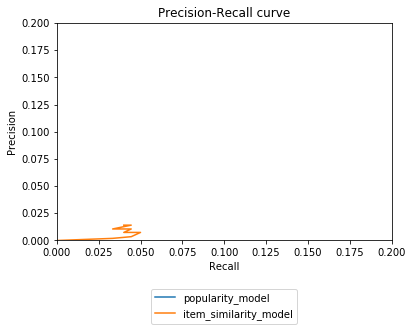

In [60]:
print("Plotting precision recall curves.")

plot_precision_recall(m2_avg_precision_list, m2_avg_recall_list, "popularity_model",
                      m1_avg_precision_list, m1_avg_recall_list, "item_similarity_model")

###### For collaborative filter based, the model is unable to find any common predictions between training and test set

#### 7.Get top - K ( K = 5) recommendations.

In [61]:
top_5 = recommend_products(573, R_df, 5)


5 most similar users for User 573:

1: User 1337, with similarity of 0.0565569315931973
2: User 1510, with similarity of 0.05172300443255273
3: User 1366, with similarity of 0.04291022478805395
4: User 566, with similarity of 0.042150486584146996
5: User 702, with similarity of 0.04136556032795624


In [64]:
for p in top_5:
    print(products_list[p])

B002WE9T2W
B008JLJCA6
B001QUDIE8
B005YXD4I8
B00007E7L4


#### 8.Summarise your insights

##### Popularity Recommendation model

###### Despite the user you choose, everyone gets the standard recommendations based the highest ratings. There is no personalisation. But this model is less compute intensive.

##### Collaborative Filtering Recommendation Model

###### Each user gets his/her own set of personalised recommendations. In order to identify the similiarity between the users, I have used adjusted cosine distance(pearson correlation) instead of jaccard. But the model is compute intensive and takes a lot of time to run.

##### Summary

###### For a cold start, popularity based recommendation is appropriate. But once the user profile is built, it would be better to switch to Collaborative Filtering recommendation system to match the user's interest.